[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/MultiNEAs/blob/main/examples/population_asteroid_tutorial.ipynb)

# MultiNEAs: The `population.Asteroid` Class Tutorial

This notebook demonstrates how to use the `multineas.population.Asteroid` class for converting between asteroid diameter and absolute magnitude.

## Installation

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multineas
except ImportError:
    print("Not running in Colab, skipping installation")

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiNEAs.git

Not running in Colab, skipping installation


## Load the Package

Import `multineas.population` and `matplotlib.pyplot`:

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from multineas.population import Asteroid
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
from multineas.plot import multineas_watermark

Welcome to MultiNEAs v0.3.2


## Convert Absolute Magnitude to Diameter

We can use `Asteroid.hmag_to_diameter` to convert absolute magnitude ($H$) to diameter ($D$). The default albedo is 0.15.

In [3]:
H = 18.0
diameter = Asteroid.hmag_to_diameter(H)
print(f"For H = {H}, Diameter = {diameter:.3f} km")

For H = 18.0, Diameter = 0.862 km


You can also specify a different albedo:

In [4]:
albedo = 0.05
diameter_low_albedo = Asteroid.hmag_to_diameter(H, albedo=albedo)
print(f"For H = {H} and albedo = {albedo}, Diameter = {diameter_low_albedo:.3f} km")

For H = 18.0 and albedo = 0.05, Diameter = 1.493 km


## Convert Diameter to Absolute Magnitude

Conversely, use `Asteroid.diameter_to_hmag` to convert diameter to absolute magnitude.

In [5]:
D = 1.0 # km
H_calc = Asteroid.diameter_to_hmag(D)
print(f"For Diameter = {D} km, H = {H_calc:.3f}")

For Diameter = 1.0 km, H = 17.677


## Visualization

Let's plot the relationship between H and Diameter for different albedos.

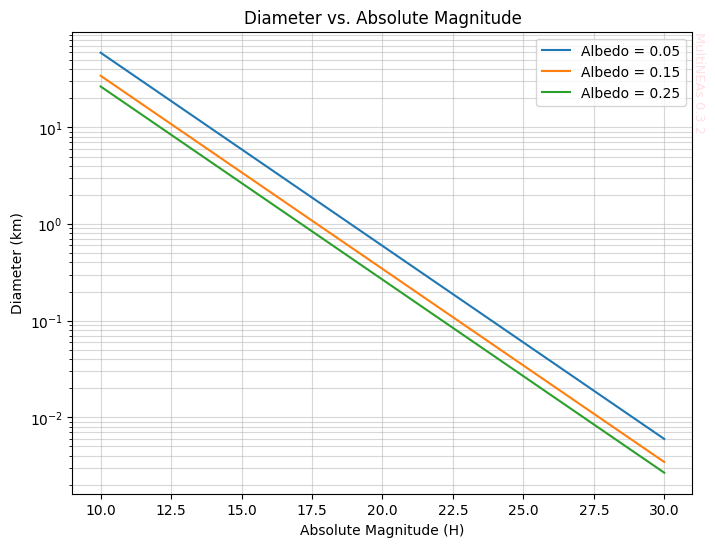

In [6]:
H_values = np.linspace(10, 30, 100)
albedos = [0.05, 0.15, 0.25]

fig, ax = plt.subplots(figsize=(8, 6))

for p_v in albedos:
    D_values = Asteroid.hmag_to_diameter(H_values, albedo=p_v)
    ax.plot(H_values, D_values, label=f"Albedo = {p_v}")

ax.set_xlabel("Absolute Magnitude (H)")
ax.set_ylabel("Diameter (km)")
ax.set_yscale("log")
ax.set_title("Diameter vs. Absolute Magnitude")
ax.legend()
ax.grid(True, which="both", ls="-", alpha=0.5)

multineas_watermark(ax)

plt.show()

## Attribution

The `Asteroid` class is part of the `multineas` package.